<center>
    <header>
        <h1>Campioname (BOZZA DEL SABATO POMERIGGIO)</h1>
        <h2>Marco Bondaschi, Mauro Conte</h2>
        <h4>Laboratorio di Telecomunicazioni</h4>
        <h5>Università Degli Studi Di Brescia</h5>
        <h6>13/03/2017</h6>
    </header>
</center>
<hr><hr>

In [1]:
#Stili per la tabella delle operazioni sui segnali
from IPython.core.display import HTML
HTML("""
<style>
    table{ 
        width:950px;    //fixed width, 950px layout large
        margin: 0 auto; //ceter table in body
    }
    
    td,th{
        text-align:center !important;
    }
     
</style>
""")

<h2>Descrizione</h2>

Per questa seconda esperienza di laboratorio abbiamo preso un segnale analogico di base, lo abbiamo campionato tramite un mantenitore e lo abbiamo ricostruito con un filtro digitale del quarto ordine. Lo scopo dell'esperienza è stato quello di valutare gli effetti di questi passaggi sul segnale ricostruito, comprese le modifiche che entrano in gioco utilizzando un oscilloscopio per visualizzare le forme d'onda.
In particolare, abbiamo valutato le differenze di effetti che questo procedimento causava su due diversi segnali:
<ul>
<li>$x\left(t\right)=sin\left(2\pi{f_0}t\right)$, con   $\ f_0=500\:Hz$</li>
<li>$y\left(t\right)=\left|\,sin\left(2\pi{f_0}t\right)\,\right|$, con   $\ f_0=500\:Hz$</li>
</ul>

<h2>Strumenti</h2>

Per raggiungere questi obiettivi abbiamo utilizzato i seguenti strumenti:
<ul>
<li>Oscilloscopio digitale <i>Agilent Technologies InfiniiVision MSO-X 3014A</i></li>
<li>Generatore di segnali analogico <i>HP 33120A</i></li>
<li>Filtro di ricostruzione digitale del IV ordine a capacità commutate</li>
<li>Microsoft Excel</li>
</ul>

<h2>Svolgimento</h2>

Il primo segnale con cui abbiamo operato è $x\left(t\right)=sin\left(2\pi{f_0}t\right)$, con $\ f_0=500\:Hz$ la cui trasformata di Fourier calcolata da $-\infty$ a $\infty$ può essere facilmente ottenuta applicando prima la formula di eulero è poi la proprietà di modulazione/traslazione della trasformata di Fourier.

$$ X\left(f\right) = \mathfrak{F}\left\{x\left(t\right)\right\}=\mathfrak{F}\left\{sin\left(2\pi{f_0}t\right)\right\} =  \mathfrak{F}\left\{\frac{1}{2j}e^{2\pi f_0t} - \frac{1}{2j}e^{-2\pi f_0t}\right\} = \frac{1}{2j}\delta{\left(f+f_0\right)}-\frac{1}{2j}\delta{\left(f-f_0\right)}$$


In primo luogo abbiamo visualizzato sull'oscilloscopio il segnale ottenuto dal generatore di funzioni e ne abbiamo visualizzato lo spettro.

Lo spettro ottenuto non coincide con quello calcolato per vari motivi:
<ul>
    <li>l'oscilloscopio calcola la trasformata di fourier sulla porzione di spettro positivo</li>
    <li>l'oscilloscopio visualizza il modulo quadro</li>
    <li>l'oscilloscopio visualizza solo una porzione della sinusoide quindi la fft calcolata risulta essere quella di una sinusoide finestrata con un rettangolo di durata il periodo</li>
</ul>

Quindi limitandoci alla porzione di spettro positivi e valutando il modulo quadro otteniamo
$$ X\left(f\right) = \frac{1}{2}\delta{\left(f-f_0\right)} $$
Il finestramento della sinusoide con un rettangolo nei tempi equivale ad una convoluzione tra lo spettro della sinusoide,una delta, e lo spettro della finetra rellangolare, un seno cardinale, ottenendo quindi un seno cardinale centrato nella frequenza della sinusoide.

<table><tr><td><img src="res/sin.png" /></td><td><img src="res/fsin.png" /></td></tr></table>


Utilizzando il generatore di funzione abbiamo generato una sinusoide campionata e mantenuta con 8 campioni sul periodo, l'abbiamo visualizzata sull'oscilloscopio e ne abbiamo mostrato lo spettro.


Campionare un segnale a una certa frequenza equivale a moltiplicarlo nel tempo per un pettine di delta con periodo l'inverso della frequenza di campionamento, ciò equivale in frequenza a fare la convoluzione tra lo spettro del segnale e lo spettro di un pettine di delta che è ancora un pettine di delta ma con periodo la frequenza di campionamento. Quindi lo spettro diventa una funzione periodica di periodo la frequenza di campionamento.


Inoltre il generatore di funzioini effettua anche un mantenimento sui campioni quindi viene introdotta un ulteriore magagna nello spettro. Mantenere un segnale per un certo periodo equivale nei tempi ad una convoluzione tra il segnale ed un rettngolo  che parte da zero e dura il tempo di mantenimento.
Qesta operazione risulta essere quella più deformate per lo spettro infatti in frequenza questo equivale ad un prodotto con un sinc che modifica quindi le ampiezze nello spettro.


<table><tr><td><img src="res/sin8.png" /></td><td><img src="res/fsin8.png" /></td></tr></table>


e parliamo un po del secondo segnale

<h1>Le operazioni che intervengono e i loro effetti</h1>

<table>
    <tr>
        <th></th>
        <th>Nel Tempo</th>
        <th>In Frequenza</th>
    </tr>
    <tr>
        <th>Segnale</th>
        <td>$x\left(t\right)$</td>
        <td>$X\left(f\right)$</td>
    </tr>
    <tr>
        <th>Campionamento</th>
        <td>$x_c\left(t\right)=x\left(t\right)\delta_{T_C}\left(t\right)$</td>
        <td>$X_c\left(f\right)=X\left(f\right)*\frac{1}{T_C}\delta_{\frac{1}{T_C}}\left(f\right)$</td>
    </tr>
    <tr>
        <th>Mantenimento</th>
        <td>$x_m\left(t\right)=x_c\left(t\right)*rect\left(\frac{t-\frac{T_C}{2}}{T_C}\right)$</td>
        <td>$X_m\left(f\right)=X_c\left(f\right)T_Csinc\left(T_Cf\right)e^{-j\pi{T_C}{f}}$</td>
    </tr>
    <tr>
        <th>Finestramento</th>
        <td>$x_f\left(t\right)=x_m\left(t\right)rect\left(\frac{t}{w}\right)$</td>
        <td>$X_f\left(f\right)=X_m\left(f\right)*wsinc\left(wf\right)$</td>
    </tr>
</table>

Proprietà di convoluzione con un $\delta_T\left(\tau\right)$:

$\psi\left(\tau\right)*\sum\limits^{\infty}_{k=-\infty}{\delta\left(\tau-\frac{k}{\tau_c}\right)}= \sum\limits^{\infty}_{k=-\infty}{ \psi\left(\tau-\frac{k}{\tau_c}\right)}$

Sviluppando un po di conti:

$X_f\left(f\right) = X_m\left(f\right)*wsinc\left(wf\right) = $

$\quad\quad\; =\left[X_c\left(f\right)T_Csinc\left(T_Cf\right)e^{-j\pi{T_C}f}\right]*wsinc\left(wf\right) = $

$\quad\quad\; =\left\{\left[X\left(f\right)*\frac{1}{T_C}\delta_{\frac{1}{T_C}}\left(f\right)\right]T_Csinc\left(T_Cf\right)e^{-j2pif}\right\}*wsinc\left(wf\right) = $

$\quad\quad\; =\frac{1}{T_C}T_Cw\left\{sinc\left(T_Cf\right)e^{-j\pi{T_C}f}\left[X\left(f\right)*\delta_{\frac{1}{T_C}}\left(f\right)\right]\right\}*sinc\left(wf\right) = $

$\quad\quad\; =w\left\{ sinc\left(T_Cf\right)e^{-j\pi{T_C}f}\sum\limits^{\infty}_{k=-\infty}{ X\left(f-\frac{k}{T_C}\right)}\right\}*sinc\left(wf\right)$

Con il seguente segnale:

$x\left(t\right)=sin\left(2\pi{f_0}t\right)$

$X\left(f\right)=\frac{j}{2}\left(\delta\left(f+f_0\right)-\delta\left(f-f_0\right)\right)$

Lavorando solo sulla porzione positiva dello spettro:

$-\frac{j}{2}\left\{ \sum\limits^{\infty}_{k=-\infty}{\delta\left(f-f_0-\frac{k}{T_C}\right)}sinc\left(T_Cf\right)e^{-j\pi{T_C}f}\right\}*sinc\left(wf\right) = -\frac{j}{2}sinc\left(T_Cf\right)e^{-j\pi{T_C}f}\sum\limits^{\infty}_{k=-\infty}{sinc\left(w\left(f-f_0-\frac{k}{T_C}\right)\right)} $

<h2>Conclusioni</h2>

per non dimenticarcelo
...ricordiamo che in tutti i calcoli svolti è stato trascurato il campionamento che l'oscilloscopio effettua sul segnale che essendo a tempi molto brevi crea repliche in molto alta frequenza che non si edono nella fft

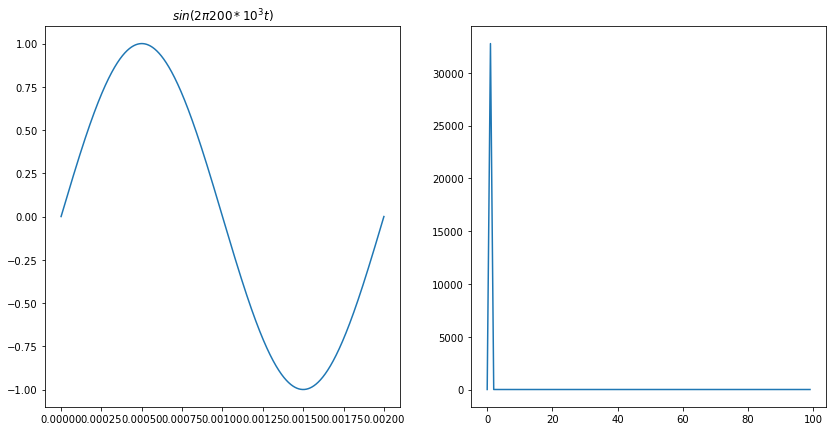

In [10]:
import numpy as np
import numpy.fft as fft
import matplotlib.pyplot as plt

N=np.power(2,16)

Fx = 500
Tx = 1/Fx

t = np.linspace(0, Tx, N)


x = np.sin(2*np.pi*Fx*t)
X = fft.fft(x)
X = X[0:100]
f = np.linspace(0, 99, 100)


fig_1 = plt.figure(figsize=(14,7))

plt.subplot(1,2,1)
plt.title("$sin(2\pi{200*10^3}t)$");
plt.plot(t,x)

plt.subplot(1,2,2)
plt.plot(f,np.abs(X))
plt.show()